## 1. Imports & Config.

In [48]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os

data_dir = os.path.join(os.getcwd(), 'data')

obsid = '1342203292'  # observation id

level = 'level2_5'

product = 'extdPLW'  # 500um band, extended
# (PLW stands for something along the lines of photometry-long-wavelength)

## 2. Load the FITS file

In [49]:
fits_dir = os.path.join(data_dir, obsid, level, product)

# each product directory contains a single .fits file
filenames = os.listdir(fits_dir)
assert len(filenames) == 1, "only one file expected"
assert filenames[0].endswith('.fits'), "file should be in .fits format"

fits_filename = os.path.join(fits_dir, filenames[0])

# open the only file in the directory
hdul = fits.open(fits_filename)  # Header Data Unit list
hdul.info()

Filename: C:\Users\Jonah\PycharmProjects\spire_blasttng_diff\data\1342203292\level2_5\extdPLW\hspireplw465_25pxmp_1513_m5736_1342203291_1342203292_1462480994103.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     175   ()      
  1  image         1 ImageHDU        47   (888, 918)   float64   
  2  error         1 ImageHDU        47   (888, 918)   float64   
  3  coverage      1 ImageHDU        47   (888, 918)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   83R x 1C   [326A]   
  6  HistoryTasks    1 BinTableHDU     46   67R x 4C   [1K, 27A, 1K, 9A]   
  7  HistoryParameters    1 BinTableHDU     74   508R x 10C   [1K, 20A, 13A, 196A, 1L, 1K, 1L, 74A, 11A, 41A]   


## 3. Load Image Data

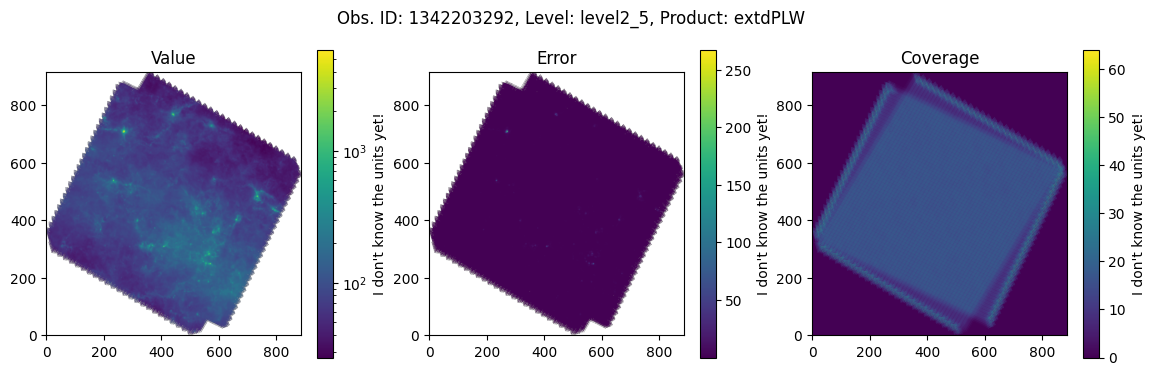

XTENSION= 'IMAGE   '           / Java FITS: Thu May 05 16:46:01 CEST 2016       
BITPIX  =                  -64                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                  888                                                  
NAXIS2  =                  918                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
          -------------- Her

In [106]:
log_norm = colors.LogNorm()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(14, 4))
fig.suptitle(f"Obs. ID: {obsid}, Level: {level}, Product: {product}")

img = hdul[1].data
ax1.set_title("Value")
fig1 = ax1.imshow(img, cmap='viridis', norm=log_norm, origin='lower')
plt.colorbar(fig1, ax=ax1, label="I don't know the units yet!")

error = hdul[2].data
ax2.set_title("Error")
fig2 = ax2.imshow(error, cmap='viridis', origin='lower')
plt.colorbar(fig2, ax=ax2, label="I don't know the units yet!")

coverage = hdul[3].data
ax3.set_title("Coverage")
fig3 = ax3.imshow(coverage, cmap='viridis', origin='lower')
plt.colorbar(fig3, ax=ax3, label="I don't know the units yet!")

plt.show()

hdul[1].header

In [ ]:
# crval1
# crval1
# crval2
# cdelt1
# cdelt2